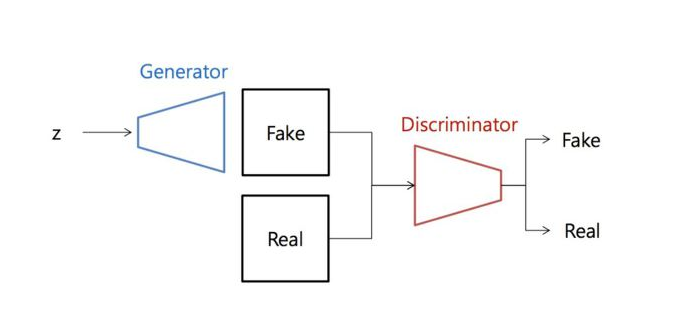

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan 학습.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

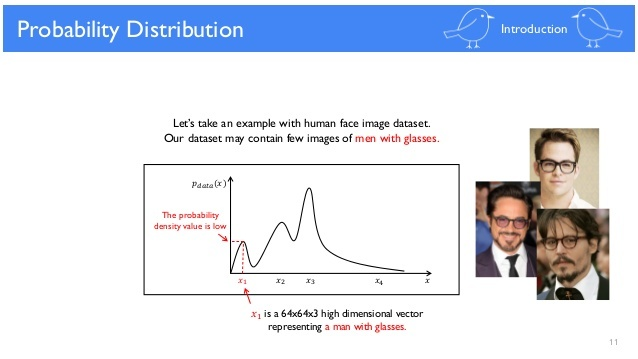

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan 분포.jfif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

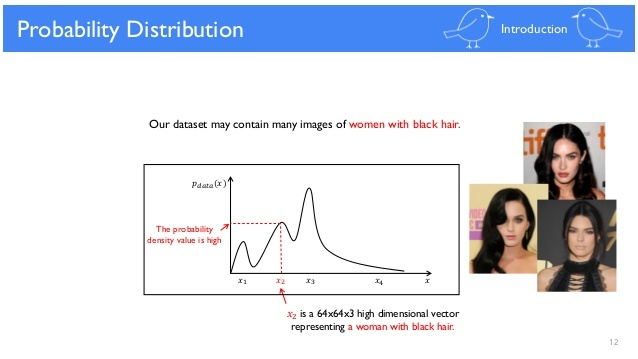

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan 분포 발표.jfif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

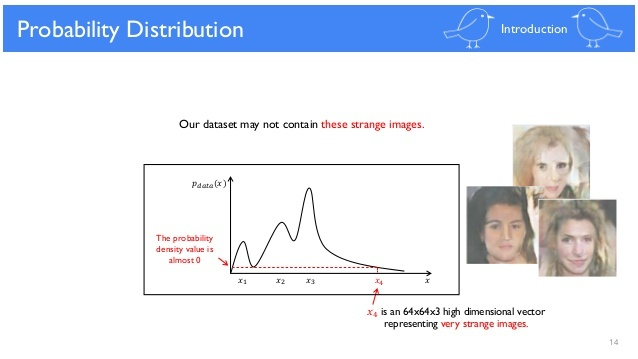

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan 분포발표.jfif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

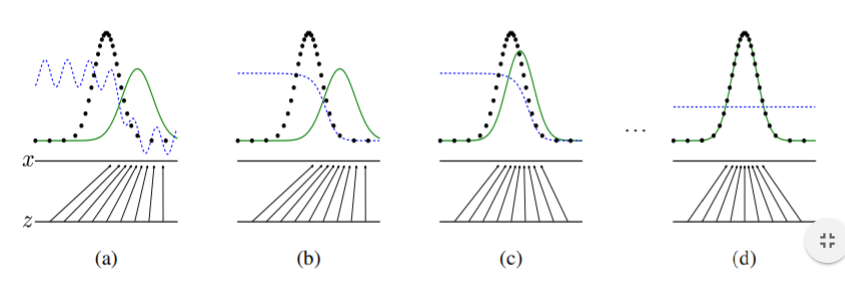

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan 발표자료.png")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
Image.fromarray(img)

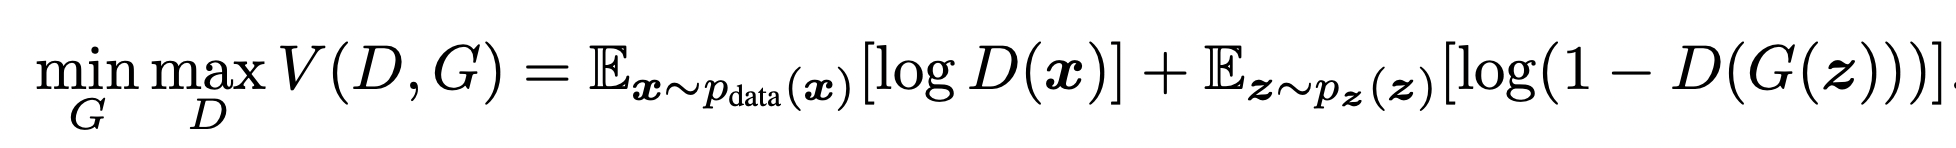

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan 발표 자료.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

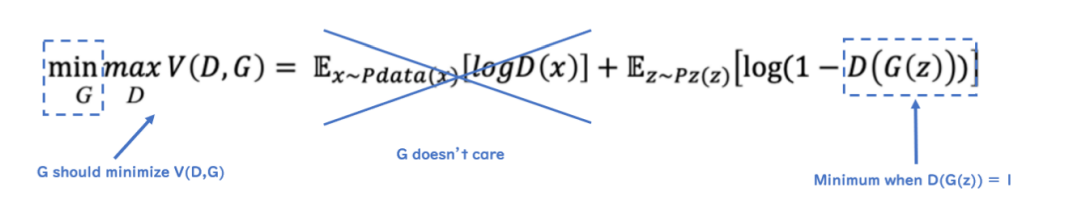

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan loss 발표.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

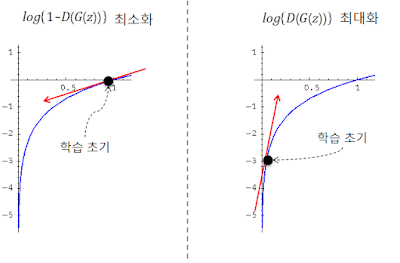

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan loss 그래프 발표.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/gan loss.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/'
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
batch_size = 128
train_loader = DataLoader(mnist_train,batch_size=batch_size,shuffle=True,drop_last=True)
test_loader = DataLoader(mnist_test,batch_size = batch_size,shuffle=False)

In [ ]:
class Generator(nn.Module):
  def __init__(self,input_dim,hidden_dim):
    super().__init__()

    self.fc_layer = nn.Sequential(
        nn.Linear(input_dim,hidden_dim),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(hidden_dim,512),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(512,784),
        nn.Tanh()
    )
  def forward(self,x):

    x = self.fc_layer(x)
    return x

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,hidden_dim):
    super().__init__()

    self.fc_layer = nn.Sequential(
        nn.Linear(784,hidden_dim),
        nn.LeakyReLU(),
        nn.Dropout(0.1),
        nn.Linear(hidden_dim,hidden_dim),
        nn.LeakyReLU(),
        nn.Dropout(0.1),
        nn.Linear(hidden_dim,1),
        nn.Sigmoid()
    )
  def forward(self,x):

    x = self.fc_layer(x)
    return x


In [ ]:
def init_params(model):
  for p in model.parameters():
    if (p.dim() > 1):
      nn.init.xavier_normal_(p)
    else :
      nn.init.uniform_(p,0.1,0.2)

In [ ]:
def imshow(img):
  fig,ax = plt.subplots(2,8,figsize=(10,5))
  img = img.view(-1,28,28).detach().cpu().numpy()

  for i,npimg in enumerate(img):
    if i < 8 :
      ax[0][i].imshow(npimg,cmap="gray")
      plt.axis("off")
    else :
      i = i%8
      ax[1][i].imshow(npimg,cmap="gray")
      plt.axis("off")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = 32
hidden_dim = 256
generator = Generator(input_dim,hidden_dim).to(device)
discriminator = Discriminator(hidden_dim).to(device)

generator.apply(init_params)
discriminator.apply(init_params)

optimizer_g = optim.Adam(generator.parameters(),lr=0.001)
optimizer_d = optim.Adam(discriminator.parameters(),lr=0.001)

criterion = nn.BCELoss()

epoch : 1 일때 판별자 loss : 0.5046835541725159 생성자 loss : 7.9307861328125

epoch : 2 일때 판별자 loss : 0.26421061158180237 생성자 loss : 9.262091636657715

epoch : 3 일때 판별자 loss : 0.40174782276153564 생성자 loss : 6.536233901977539

epoch : 4 일때 판별자 loss : 0.5432889461517334 생성자 loss : 4.781495571136475

epoch : 5 일때 판별자 loss : 0.5322953462600708 생성자 loss : 3.8482983112335205

epoch : 6 일때 판별자 loss : 0.44306737184524536 생성자 loss : 4.5618085861206055

epoch : 7 일때 판별자 loss : 0.4702923595905304 생성자 loss : 4.97631311416626

epoch : 8 일때 판별자 loss : 0.40423154830932617 생성자 loss : 4.306511878967285

epoch : 9 일때 판별자 loss : 0.3963567316532135 생성자 loss : 4.683445930480957

epoch : 10 일때 판별자 loss : 0.31939882040023804 생성자 loss : 4.856166839599609

epoch : 11 일때 판별자 loss : 0.31099754571914673 생성자 loss : 4.723343849182129

epoch : 12 일때 판별자 loss : 0.35240238904953003 생성자 loss : 5.298044204711914

epoch : 13 일때 판별자 loss : 0.288436621427536 생성자 loss : 5.019967555999756

epoch : 14 일때 판별자 loss : 0.231762081384658

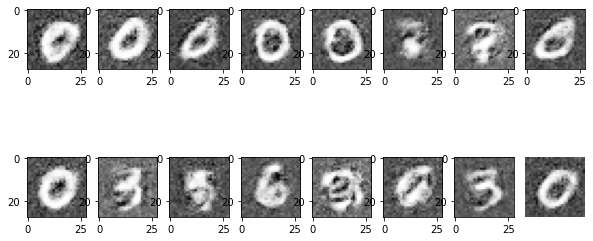

In [ ]:
generator.train()
discriminator.train()

bucket = []
fake_bucket = []
buffer=  []
fake_buffer = []

for epoch in range(50):

  avg_loss_g = 0
  avg_loss_d = 0

  for X_train,label in train_loader:

    X_train = X_train.to(device)
    z = torch.randn(batch_size,input_dim,device=device)
    X_train = X_train.view(-1,28*28)
    X_train_labels = torch.ones(batch_size,1,device=device)
    outputs = discriminator(X_train)
    loss_d = criterion(outputs,X_train_labels)
    output = outputs

    X_fake_train = generator(z)
    X_fake_labels = torch.zeros(batch_size,1,device=device)
    outputs = discriminator(X_fake_train)
    loss_d_fake = criterion(outputs,X_fake_labels)
    fake_output = outputs

    loss_d_total = loss_d + loss_d_fake

    optimizer_d.zero_grad()
    loss_d_total.backward()
    optimizer_d.step()

    z = torch.randn(batch_size,input_dim,device=device)
    X_fake_train = generator(z)
    outputs = discriminator(X_fake_train)
    loss_g = criterion(outputs,X_train_labels)
    optimizer_g.zero_grad()
    loss_g.backward()
    optimizer_g.step()

    avg_loss_d += loss_d_total / len(train_loader)
    avg_loss_g += loss_g / len(train_loader)
  
  bucket.append(output.mean().item())
  fake_bucket.append(fake_output.mean().item())
  output, fake_output = evaluate_model()
  buffer.append(output)
  fake_buffer.append(fake_output)
  print("epoch : {} 일때 판별자 loss : {} 생성자 loss : {}\n".format(epoch+1,avg_loss_d,avg_loss_g))
  if (epoch + 1) % 50 == 0:
    z = torch.randn(batch_size,input_dim,device=device)
    img = generator(z)
    imshow(img)


    

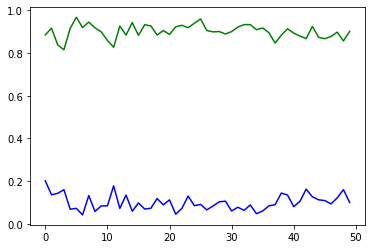

In [ ]:
plt.plot(range(50),bucket,color="g")
plt.plot(range(50),fake_bucket,color="b")

In [ ]:
def evaluate_model():
  output, fake_output = 0.0, 0.0
  generator.eval()
  discriminator.eval()

  for X_test,label in test_loader:
    
    X_test = X_test.view(-1,28*28)
    X_test = X_test.to(device)
    z = torch.randn(batch_size,input_dim,device=device)
    with torch.autograd.no_grad():
      output += discriminator(X_test).sum().item() / len(test_loader.dataset)
      fake_output += discriminator(generator(z)).sum().item() / len(test_loader.dataset)
  return output , fake_output
